# French employment, salaries, population per town

---
## Libraries importation

In [27]:
import pandas as pd
import numpy as np
import seaborn as sn

---
## Datasets importation

In [28]:
firms = pd.read_csv("/home/vincent/Hitema/datasets/2989_5652_bundle_archive/base_etablissement_par_tranche_effectif.csv")
towns = pd.read_csv("/home/vincent/Hitema/datasets/2989_5652_bundle_archive/name_geographic_information.csv")
salaries = pd.read_csv("/home/vincent/Hitema/datasets/2989_5652_bundle_archive/net_salary_per_town_categories.csv")
population = pd.read_csv("/home/vincent/Hitema/datasets/2989_5652_bundle_archive/population.csv")

---
## Renaming colums

In [29]:
towns = towns.rename(columns={"code_insee": "CODGEO"})

In [30]:
mapping = {
    'E14TST': 'total_firms',
    'E14TS0ND': 'nb_unk_town',
    'E14TS1': '1_5_employees',
    'E14TS6': '6_9_employees',
    'E14TS10': '10_19_employees',
    'E14TS20': '20_49_employees',
    'E14TS50': '50_99_employees',
    'E14TS100': '100_199_employees',
    'E14TS200': '200_499_employees',
    'E14TS500': 'more_500_employees'
}

firms = firms.rename(columns=mapping)

In [31]:
mapping = {
    'SNHM14': 'mean_salary',
    'SNHMC14': 'executive',
    'SNHMP14': 'middle_manager',
    'SNHME14': 'employee',
    'SNHMO14': 'worker',
    'SNHMF14': 'women',
    'SNHMFC14': 'f_executive',
    'SNHMFP14': 'f_middle_manager',
    'SNHMFE14': 'f_employee',
    'SNHMFO14': 'f_worker',
    'SNHMH14': 'man',
    'SNHMHC14': 'm_executive',
    'SNHMHP14': 'm_middle_manager',
    'SNHMHE14': 'm_employee',
    'SNHMHO14': 'm_worker',
    'SNHM1814': '18-25y',
    'SNHM2614': '26-50y',
    'SNHM5014': 'sup_50y',
    'SNHMF1814': 'f_18-25y',
    'SNHMF2614': 'f_26-50y',
    'SNHMF5014': 'f_sup_50y',
    'SNHMH1814': 'm_18-25y',
    'SNHMH2614': 'm_26-50y',
    'SNHMH5014': 'm_sup_50y'
}

salaries = salaries.rename(columns=mapping)

---
## Converting "CODGEO" type

In [32]:
firms["CODGEO"] = firms["CODGEO"].astype(str)
towns['CODGEO'] = towns['CODGEO'].astype(str)
salaries["CODGEO"] = salaries["CODGEO"].astype(str)
population["CODGEO"] = population["CODGEO"].astype(str)

---
## Datasets infos

In [33]:
print(firms.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36681 entries, 0 to 36680
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CODGEO              36681 non-null  object
 1   LIBGEO              36681 non-null  object
 2   REG                 36681 non-null  int64 
 3   DEP                 36681 non-null  object
 4   total_firms         36681 non-null  int64 
 5   nb_unk_town         36681 non-null  int64 
 6   1_5_employees       36681 non-null  int64 
 7   6_9_employees       36681 non-null  int64 
 8   10_19_employees     36681 non-null  int64 
 9   20_49_employees     36681 non-null  int64 
 10  50_99_employees     36681 non-null  int64 
 11  100_199_employees   36681 non-null  int64 
 12  200_499_employees   36681 non-null  int64 
 13  more_500_employees  36681 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 3.9+ MB
None


In [34]:
print(towns.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36840 entries, 0 to 36839
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EU_circo                36840 non-null  object 
 1   code_région             36840 non-null  int64  
 2   nom_région              36840 non-null  object 
 3   chef.lieu_région        36840 non-null  object 
 4   numéro_département      36840 non-null  object 
 5   nom_département         36840 non-null  object 
 6   préfecture              36840 non-null  object 
 7   numéro_circonscription  36840 non-null  int64  
 8   nom_commune             36840 non-null  object 
 9   codes_postaux           36840 non-null  object 
 10  CODGEO                  36840 non-null  object 
 11  latitude                33911 non-null  float64
 12  longitude               33999 non-null  object 
 13  éloignement             33878 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [35]:
print(salaries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5136 entries, 0 to 5135
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CODGEO            5136 non-null   object 
 1   LIBGEO            5136 non-null   object 
 2   mean_salary       5136 non-null   float64
 3   executive         5136 non-null   float64
 4   middle_manager    5136 non-null   float64
 5   employee          5136 non-null   float64
 6   worker            5136 non-null   float64
 7   women             5136 non-null   float64
 8   f_executive       5136 non-null   float64
 9   f_middle_manager  5136 non-null   float64
 10  f_employee        5136 non-null   float64
 11  f_worker          5136 non-null   float64
 12  man               5136 non-null   float64
 13  m_executive       5136 non-null   float64
 14  m_middle_manager  5136 non-null   float64
 15  m_employee        5136 non-null   float64
 16  m_worker          5136 non-null   float64


In [36]:
print(population.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8536584 entries, 0 to 8536583
Data columns (total 7 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   NIVGEO     object
 1   CODGEO     object
 2   LIBGEO     object
 3   MOCO       int64 
 4   AGEQ80_17  int64 
 5   SEXE       int64 
 6   NB         int64 
dtypes: int64(4), object(3)
memory usage: 455.9+ MB
None


<AxesSubplot:>

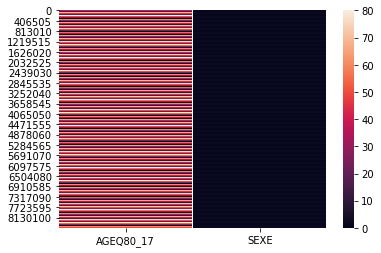

In [41]:
df = population.drop(columns={'NIVGEO', 'CODGEO', 'LIBGEO', 'MOCO', 'NB'})
hm = sn.heatmap(df)
hm